# import Dependency

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the model

In [41]:
model = load_model('./model/bmimaintenance_model.h5')

# Prepare the test generator

In [43]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalization
test_generator = test_datagen.flow_from_directory(
    './dataset/test',  # Replace with your test data directory
    target_size=(224, 224),  # Same as your model input size
    batch_size=1,
    class_mode='categorical',  # Use the same class_mode as during training
    shuffle=False
)

Found 25 images belonging to 5 classes.


# Define a confidence threshold

In [46]:
CONFIDENCE_THRESHOLD = 0.6  # Adjust this value as needed (e.g., 60%)

# Predict the Calorie level

In [48]:
def predict_calorie(img_path, model, class_indices, threshold=CONFIDENCE_THRESHOLD):
    img = load_img(img_path, target_size=(224, 224))  # Resize to model's input size
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    confidence = predictions[0][predicted_index]

    # Reverse the dictionary to get class labels
    class_labels = {v: k for k, v in class_indices.items()}

    if confidence >= threshold:
        class_label = class_labels[predicted_index]
    else:
        class_label = "not identified"  # Assign "unknown" if below the threshold

    return class_label, confidence

In [50]:
def predict_calorie(img_path, model, class_indices, threshold=CONFIDENCE_THRESHOLD):
    img = load_img(img_path, target_size=(224, 224))  # Resize to model's input size
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    confidence = predictions[0][predicted_index]

    # Reverse the dictionary to get class labels
    class_labels = {v: k for k, v in class_indices.items()}

    if confidence >= threshold:
        class_label = class_labels[predicted_index]
    else:
        class_label = "not identified"  # Assign "unknown" if below the threshold

    return class_label, confidence

# Display the prediction

In [52]:
def display_prediction(img_path, class_label, confidence, img_height, img_width):
    img = image.load_img(img_path, target_size=(img_height, img_width))  # Load and resize image
    plt.imshow(img)
    plt.title(f'Prediction: {class_label} ({confidence * 100:.2f}%)')
    plt.axis('off')  # Hide axes for better display
    plt.show()

# Visualizing the Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted calorie: high_calories with confidence 75.71%


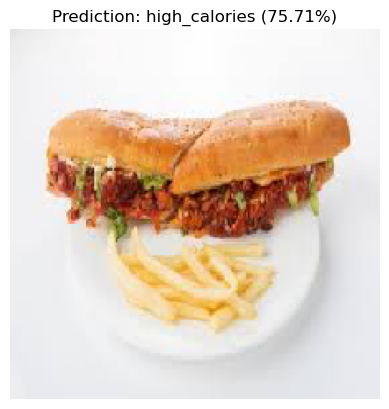

In [60]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
img_path = './img/submarine.jpeg'  # Replace with your image path
class_label, confidence = predict_calorie(img_path, model, test_generator.class_indices)
print(f'Predicted calorie: {class_label} with confidence {confidence*100:.2f}%')

display_prediction(img_path, class_label, confidence, IMG_HEIGHT, IMG_WIDTH)